In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas

from weave_units import WeaveUnit
from tile_map import Tiling

In [2]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

## Biaxial weave

<AxesSubplot:>

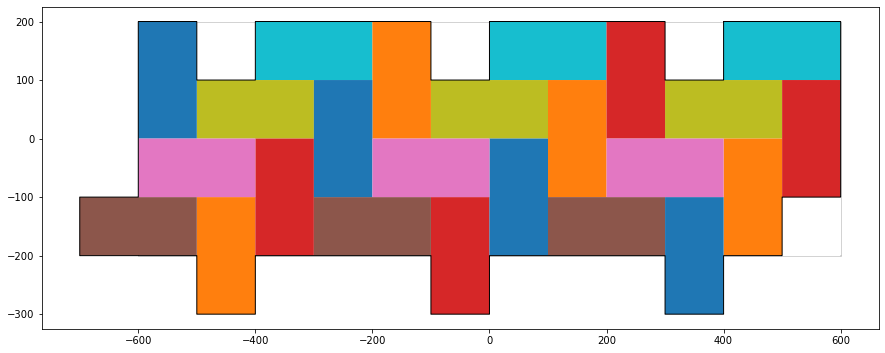

In [3]:
w1 = WeaveUnit(weave_type = "twill", spacing = 100,  # aspect = .8,
                    margin = 0., strands = "abc|defg", crs = 2193)

ax = w1.tile.plot(facecolor = "#00000000", edgecolor = "lightgrey", 
                  figsize = (15, 8))
w1.elements.plot(ax = ax, column = "element_id", edgecolor = "k", linewidth = 0)
w1.regularised_tile.plot(ax = ax, facecolor = "#00000000", edgecolor = "k")

In [4]:
weave1 = Tiling(w1, ak, id_var = "DZ2018")

In [5]:
textile1 = weave1.get_tiled_map(rotation = 30, prioritise_tiles = True)

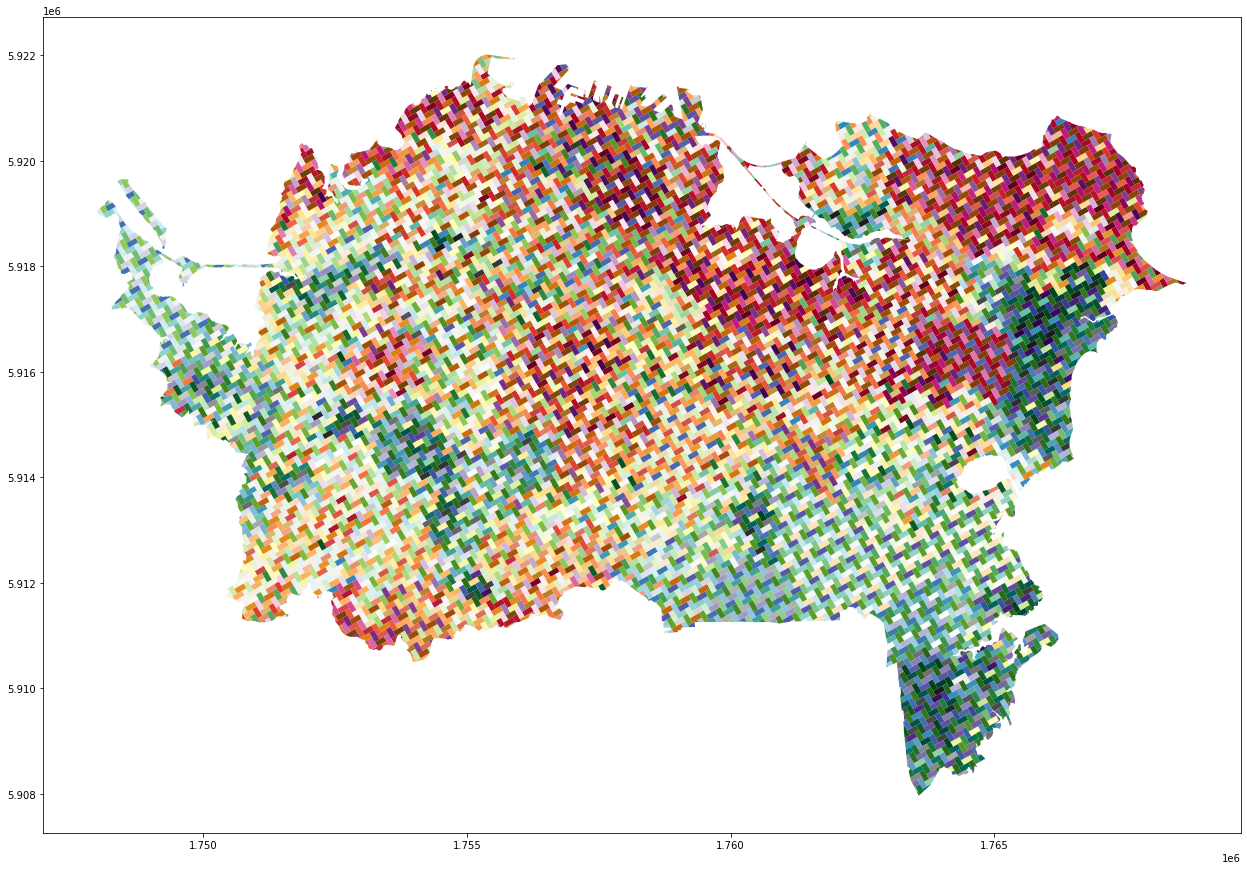

In [6]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

strands = set(textile1.element_id)
cols = [x for x in textile1.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral",
         "PiYG", "PRGn", "PuOr")
# cmaps = ["Greys"] * 8

for strand, col, cmap in zip(strands, cols, cmaps):
    textile1[textile1.element_id == strand].plot(ax = ax, column = col, 
                                                 cmap = cmap, k = 100, 
                                                 scheme = "equal_interval", 
                                                 linewidth = 0)
# ak.plot(ax = ax, facecolor = "#00000000", edgecolor = "grey")

## Triaxial weave

<AxesSubplot:>

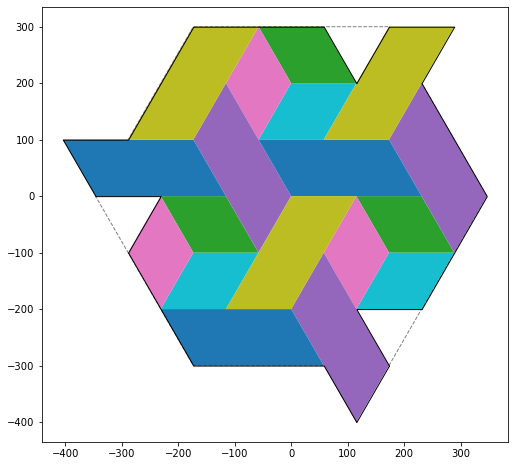

In [7]:
w2 = WeaveUnit(weave_type = "cube", spacing = 100,  # aspect = .8,
                    margin = .0, strands = "a-b|c-d|e-f", crs = 2193)

ax = w2.tile.plot(facecolor = "#00000000", edgecolor = "grey", 
                  linestyle = "dashed", figsize = (15, 8))
w2.elements.plot(ax = ax, column = "element_id", edgecolor = "k", linewidth = 0)
w2.regularised_tile.plot(ax = ax, facecolor = "#00000000", 
                         edgecolor = "k")

In [8]:
weave2 = Tiling(w2, ak, id_var = "DZ2018")

In [9]:
textile2 = weave2.get_tiled_map(rotation = 20, prioritise_tiles = True)

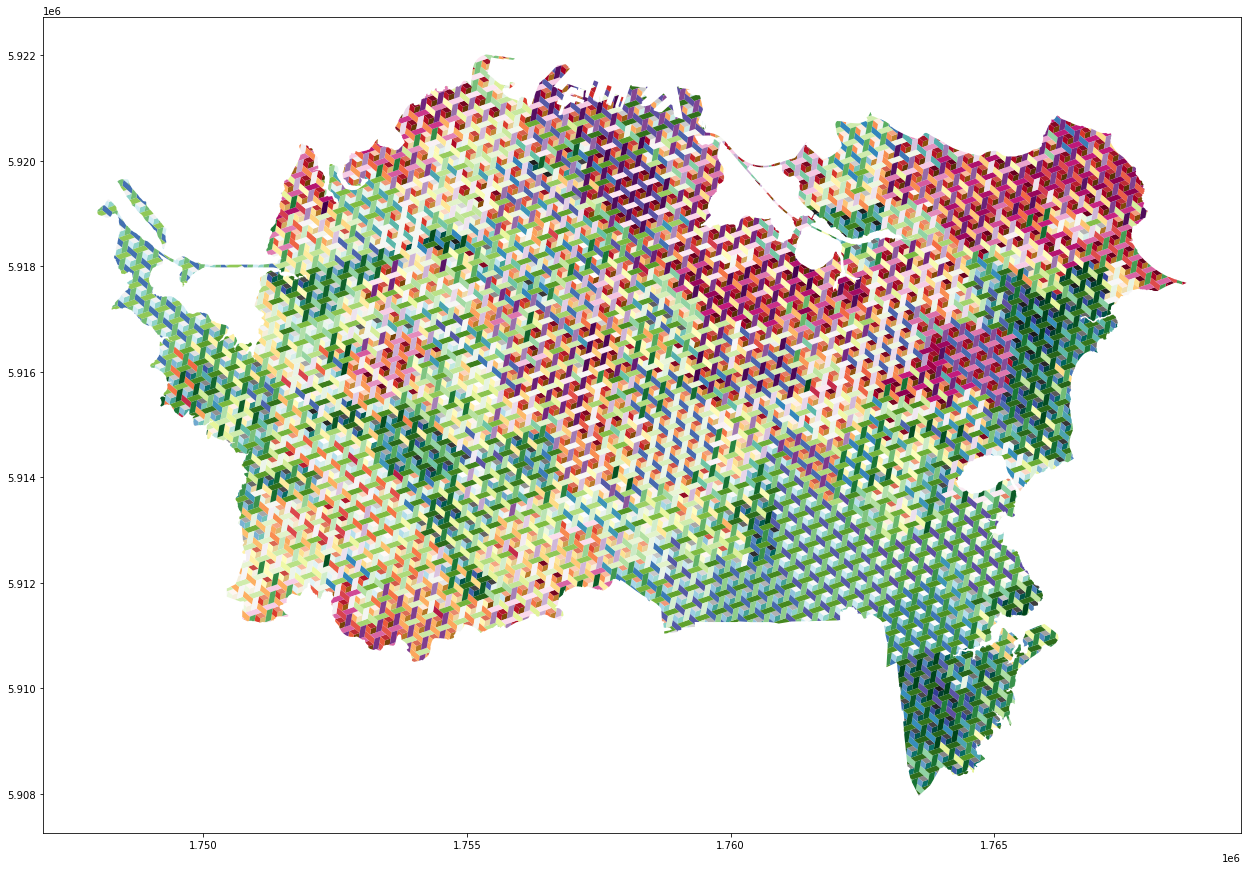

In [10]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

strands = set(textile2.element_id)
cols = [x for x in textile2.columns if "Rank" in x]
# cmaps = ("OrRd", "BuPu", "Greys", "BuGn", "YlOrRd", "YlGnBu", "RdPu")
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral",
         "PiYG", "PRGn", "PuOr", "viridis")
# cmaps = ["Greys"] * 8
for strand, col, cmap in zip(strands, cols, cmaps):
    textile2[textile2.element_id == strand].plot(ax = ax, column = col, 
                                             cmap = cmap, linewidth = 0,
                                             scheme = "equal_interval",
                                             k = 100)
# ak.plot(ax = ax, facecolor = "#00000000", edgecolor = "r")